# Tumor de Cerebro

<p>
Curso de Minería de Datos <br>
Autor: Cristian Pavez Hormazábal
</p>

## Análisis exploratorio de los datos

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sklearn as sk
import yellowbrick as yb

In [2]:
# Importación de datos
dataset = pd.read_csv("data/brain_tumor_dataset.csv")
dataset.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [3]:
# Revisión de valores únicos por columna
cols = dataset.columns.tolist()
for col in cols:
    print(f"{col}: {dataset[col].unique()}")

Patient_ID: [    1     2     3 ... 19998 19999 20000]
Age: [73 26 31 29 54 27 72 61 50 79 58 71 62 37 20 67 65 36 46 55 76 49 41 38
 63 44 56 70 42 64 48 52 78 23 39 33 32 34 30 25 75 43 47 28 60 66 35 57
 22 21 59 69 45 40 51 74 24 53 68 77]
Gender: ['Male' 'Female']
Tumor_Type: ['Malignant' 'Benign']
Tumor_Size: [5.37561155 4.84709779 5.58839071 ... 3.61863429 8.5190863  9.71676844]
Location: ['Temporal' 'Parietal' 'Frontal' 'Occipital']
Histology: ['Astrocytoma' 'Glioblastoma' 'Meningioma' 'Medulloblastoma']
Stage: ['III' 'II' 'I' 'IV']
Symptom_1: ['Vision Issues' 'Headache' 'Seizures' 'Nausea']
Symptom_2: ['Seizures' 'Headache' 'Vision Issues' 'Nausea']
Symptom_3: ['Seizures' 'Nausea' 'Headache' 'Vision Issues']
Radiation_Treatment: ['No' 'Yes']
Surgery_Performed: ['No' 'Yes']
Chemotherapy: ['No' 'Yes']
Survival_Rate: [51.31257903 46.37327271 47.07222097 ... 89.54380317 83.30678093
 47.43346759]
Tumor_Growth_Rate: [0.11187562 2.16573562 1.88422778 ... 2.33288086 2.38720166 2.464077

In [4]:
# Formateo de los datos
dataset.drop("Patient_ID", axis=1, inplace=True)
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})
dataset['Tumor_Type'] = dataset['Tumor_Type'].map({'Malignant': 1, 'Benign': 0})
dataset['Location'] = dataset['Location'].map({'Frontal': 0, 'Parietal': 1, 'Temporal': 2, 'Occipital': 3})
dataset['Histology'] = dataset['Histology'].map({'Astrocytoma': 0, 'Glioblastoma': 1, 'Meningioma': 2, 'Medulloblastoma': 3})
dataset['Stage'] = dataset['Stage'].map({'I': 0, 'II': 1, 'III': 2, 'IV': 3})
dataset['Symptom_1'] = dataset['Symptom_1'].map({'Headache': 0, 'Seizures': 1, 'Vision Issues': 2, 'Nausea': 3})
dataset['Symptom_2'] = dataset['Symptom_2'].map({'Headache': 0, 'Seizures': 1, 'Vision Issues': 2, 'Nausea': 3})
dataset['Symptom_3'] = dataset['Symptom_3'].map({'Headache': 0, 'Seizures': 1, 'Vision Issues': 2, 'Nausea': 3})
dataset['Radiation_Treatment'] = dataset['Radiation_Treatment'].map({'Yes': 1, 'No': 0})
dataset['Surgery_Performed'] = dataset['Surgery_Performed'].map({'Yes': 1, 'No': 0})
dataset['Chemotherapy'] = dataset['Chemotherapy'].map({'Yes': 1, 'No': 0})
dataset['Family_History'] = dataset['Family_History'].map({'Yes': 1, 'No': 0})
dataset['MRI_Result'] = dataset['MRI_Result'].map({'Positive': 1, 'Negative': 0})
dataset['Follow_Up_Required'] = dataset['Follow_Up_Required'].map({'Yes': 1, 'No': 0})

dataset.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,1,1,5.375612,2,0,2,2,1,1,0,0,0,51.312579,0.111876,0,1,1
1,26,1,0,4.847098,1,1,1,0,0,3,1,1,1,46.373273,2.165736,1,1,1
2,31,1,0,5.588391,1,2,0,2,0,1,0,0,0,47.072221,1.884228,0,0,0
3,29,1,1,1.436600,2,3,3,2,1,0,1,0,1,51.853634,1.283342,1,0,0
4,54,0,0,2.417506,1,1,0,0,0,1,0,0,1,54.708987,2.069477,0,1,1


In [5]:
# Analisis de missing values
dataset.isna().sum()

Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [6]:
# Revisión de duplicados
print(dataset.duplicated().sum())

0


In [7]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
dataset.describe()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,49.433700,0.499200,0.50150,5.236552,1.506350,1.501850,1.495150,1.492550,1.494250,1.503850,0.501050,0.503000,0.504850,70.131699,1.547701,0.499900,0.50145,0.505050
std,17.389296,0.500012,0.50001,2.754359,1.113203,1.114297,1.115992,1.118663,1.114778,1.116534,0.500011,0.500004,0.499989,17.270834,0.835995,0.500012,0.50001,0.499987
min,20.000000,0.000000,0.00000,0.500410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.002386,0.100017,0.000000,0.00000,0.000000
25%,34.000000,0.000000,0.00000,2.836686,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,55.224439,0.830433,0.000000,0.00000,0.000000
50%,49.000000,0.000000,1.00000,5.200675,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.305066,1.541821,0.000000,1.00000,1.000000
75%,65.000000,1.000000,1.00000,7.624299,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,85.043395,2.262484,1.000000,1.00000,1.000000
max,79.000000,1.000000,1.00000,9.999420,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,99.998125,2.999835,1.000000,1.00000,1.000000


In [8]:
# Revisión de tipos de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  20000 non-null  int64  
 1   Gender               20000 non-null  int64  
 2   Tumor_Type           20000 non-null  int64  
 3   Tumor_Size           20000 non-null  float64
 4   Location             20000 non-null  int64  
 5   Histology            20000 non-null  int64  
 6   Stage                20000 non-null  int64  
 7   Symptom_1            20000 non-null  int64  
 8   Symptom_2            20000 non-null  int64  
 9   Symptom_3            20000 non-null  int64  
 10  Radiation_Treatment  20000 non-null  int64  
 11  Surgery_Performed    20000 non-null  int64  
 12  Chemotherapy         20000 non-null  int64  
 13  Survival_Rate        20000 non-null  float64
 14  Tumor_Growth_Rate    20000 non-null  float64
 15  Family_History       20000 non-null 

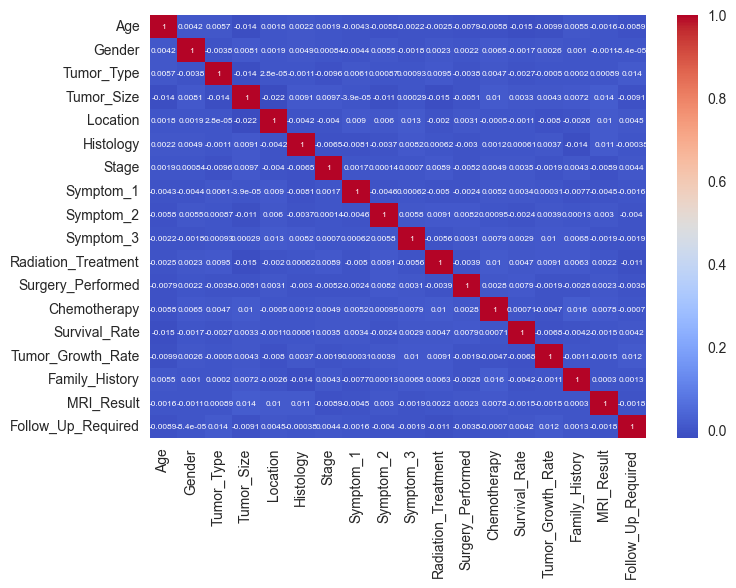

In [9]:
# Revisión de la corralación entre variables
numeric_df = dataset.select_dtypes(include="number")
sns.heatmap(numeric_df.corr(method="pearson"), annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.show()

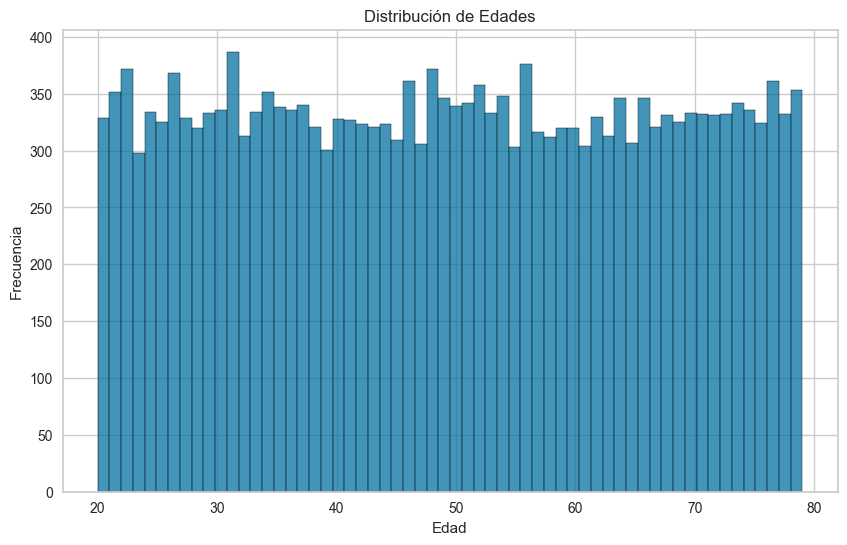

In [10]:
# Revisión de la distribución de las edades
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=60)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

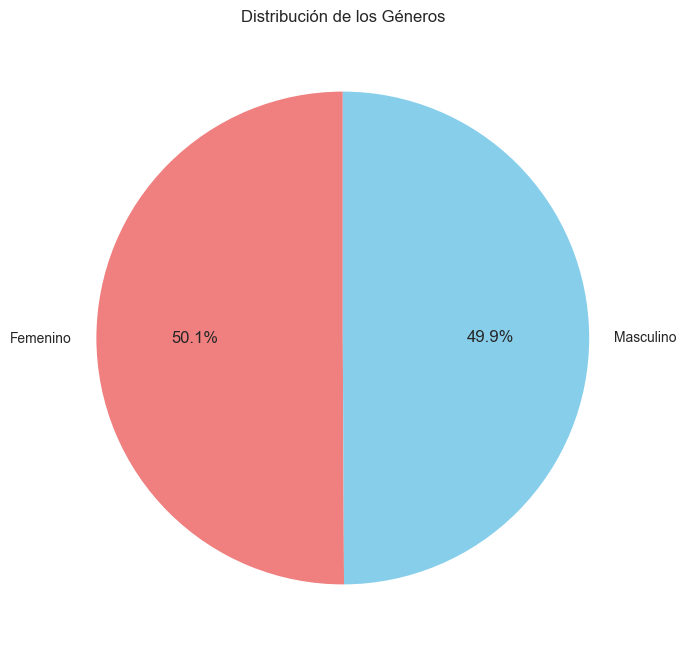

In [11]:
# Revisión de la distribución de los géneros
gender_counts = dataset['Gender'].value_counts()
gender_labels = ['Masculino' if gender == 1 else 'Femenino' for gender in gender_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Distribución de los Géneros')
plt.show()

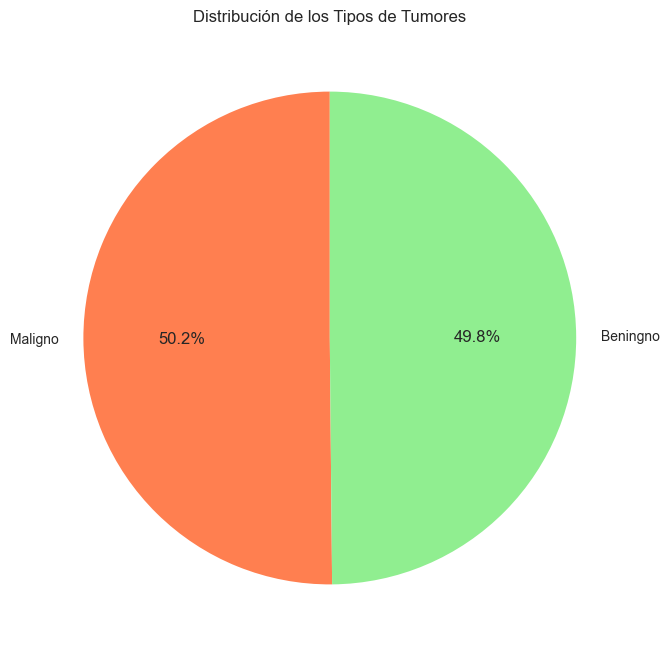

In [12]:
# Revisión de la distribución de los géneros
tumor_counts = dataset['Tumor_Type'].value_counts()
tumor_labels = ['Maligno' if tumor == 1 else 'Beningno' for tumor in tumor_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(tumor_counts, labels=tumor_labels, autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen'])
plt.title('Distribución de los Tipos de Tumores')
plt.show()

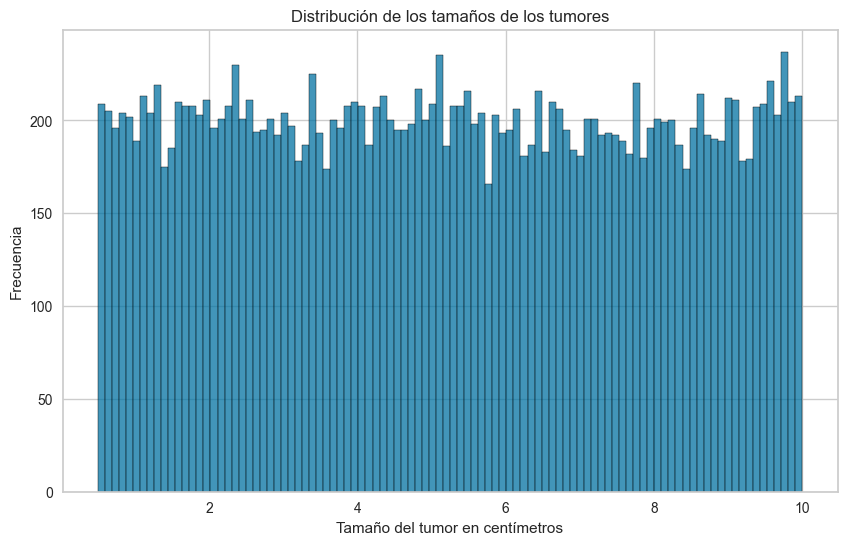

In [13]:
# Revisión de la distribución de los tamaños de los tumores
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Tumor_Size'], bins=100)
plt.title('Distribución de los tamaños de los tumores')
plt.xlabel('Tamaño del tumor en centímetros')
plt.ylabel('Frecuencia')
plt.show()

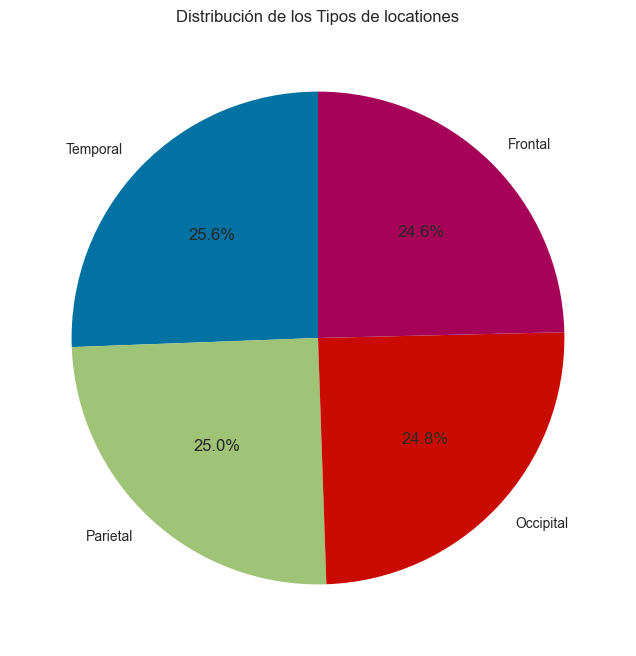

In [14]:
# Revisión de la distribución del lugar del tumor
location_counts = dataset['Location'].value_counts()
location_labels = ['Frontal' if location == 0 else 'Parietal' if location == 1 else 'Temporal' if location == 2 else 'Occipital' for location in location_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los Tipos de locationes')
plt.show()

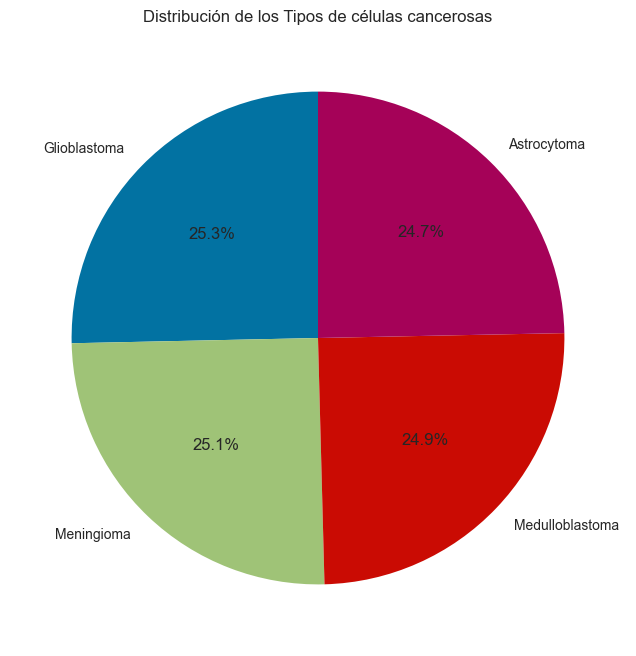

In [15]:
# Revisión del tipo de histología del tumor
location_counts = dataset['Histology'].value_counts()
location_labels = ['Astrocytoma' if location == 0 else 'Glioblastoma' if location == 1 else 'Meningioma' if location == 2 else 'Medulloblastoma' for location in location_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los Tipos de células cancerosas')
plt.show()

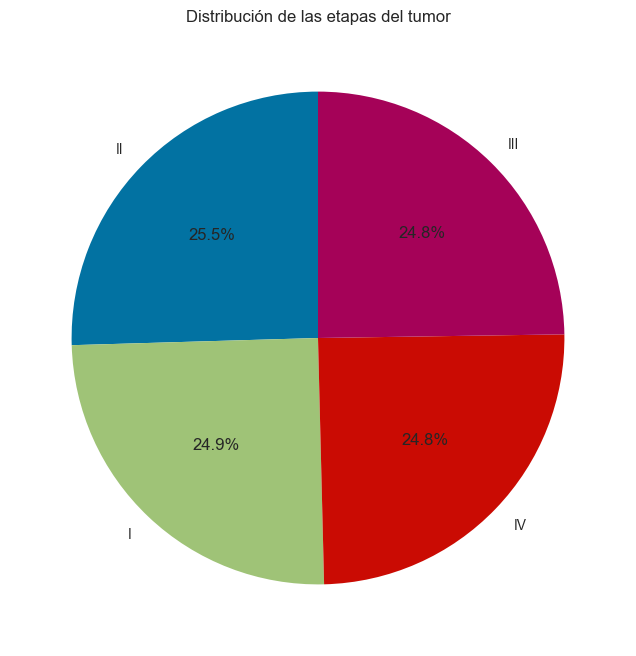

In [16]:
# Revisión de la distribución de la etapa del tumor
stage_counts = dataset['Stage'].value_counts()
stage_labels = ['I' if stage == 0 else 'II' if stage == 1 else 'III' if stage == 2 else 'IV' for stage in stage_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(stage_counts, labels=stage_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las etapas del tumor')
plt.show()

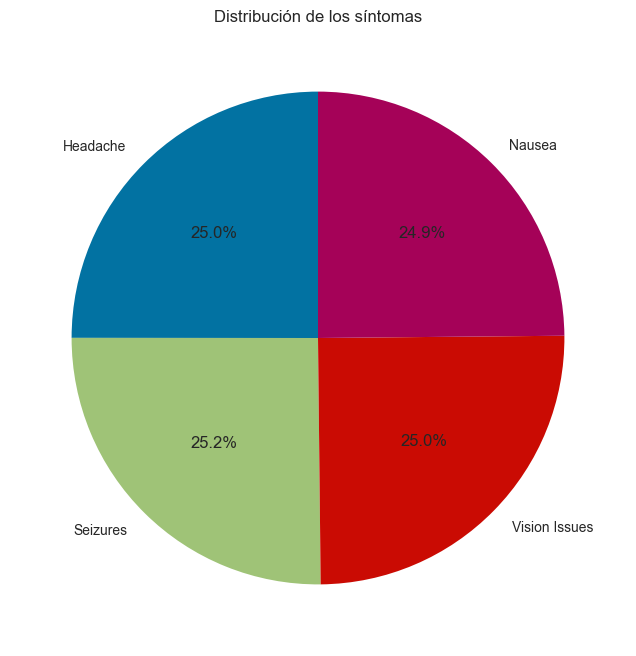

In [17]:
#Revisión de la distribución de los síntomas
symptom_counts = dataset['Symptom_1'].value_counts() + dataset['Symptom_2'].value_counts() + dataset['Symptom_3'].value_counts()
symptom_counts = symptom_counts.groupby(symptom_counts.index).sum()
symptom_labels = ['Headache' if symptom == 0 else 'Seizures' if symptom == 1 else 'Vision Issues' if symptom == 2 else 'Nausea' for symptom in symptom_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(symptom_counts, labels=symptom_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los síntomas')
plt.show()

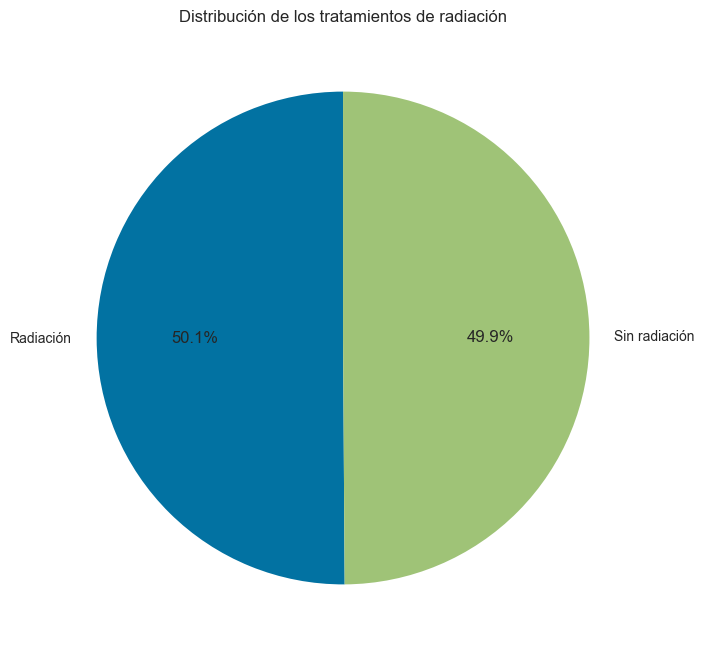

In [18]:
# Revisión de la distribución del tratamiento de radiación
radiation_treatment_counts = dataset['Radiation_Treatment'].value_counts()
radiation_treatment_labels = ['Radiación' if treatment == 1 else 'Sin radiación' for treatment in radiation_treatment_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(radiation_treatment_counts, labels=radiation_treatment_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los tratamientos de radiación')
plt.show()


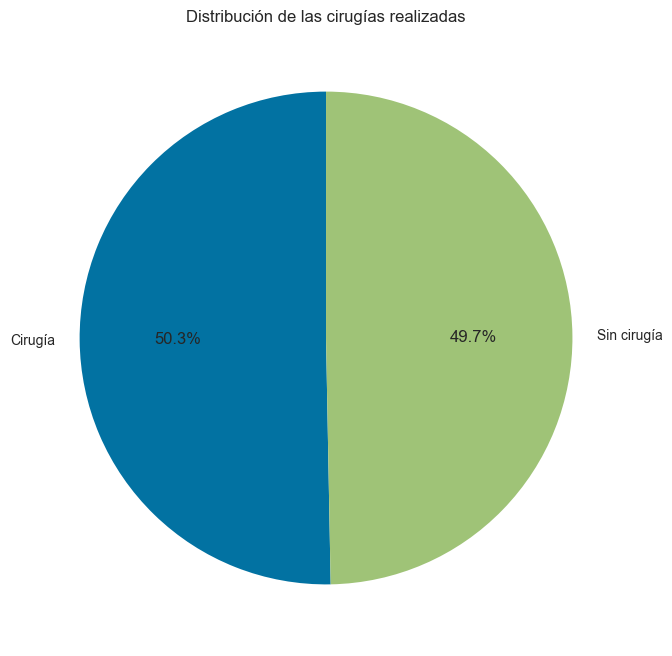

In [19]:
# Revisión de la distribución de cirujía realizada
surgery_counts = dataset['Surgery_Performed'].value_counts()
surgery_labels = ['Cirugía' if surgery == 1 else 'Sin cirugía' for surgery in surgery_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(surgery_counts, labels=surgery_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las cirugías realizadas')
plt.show()

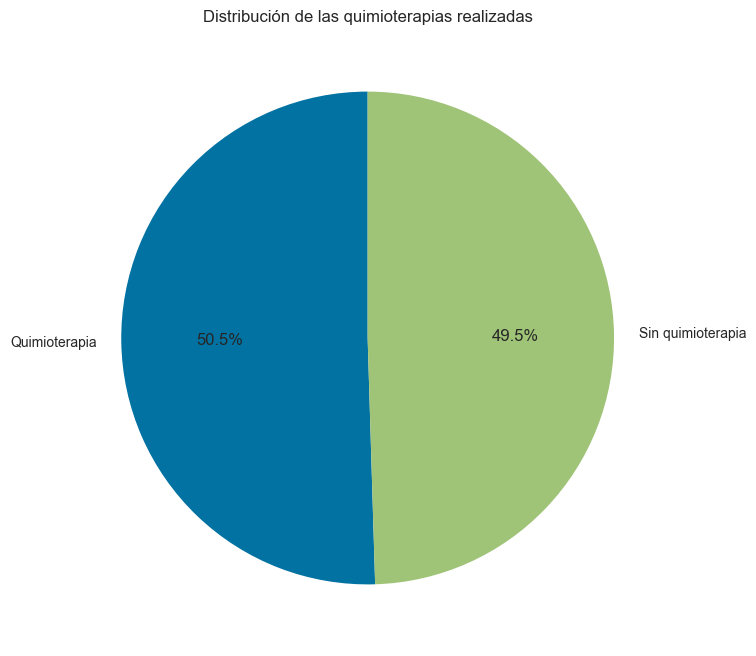

In [20]:
# REvisión de la distribución de quimioterapia
chemotherapy_counts = dataset['Chemotherapy'].value_counts()
chemotherapy_labels = ['Quimioterapia' if chemotherapy == 1 else 'Sin quimioterapia' for chemotherapy in chemotherapy_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(chemotherapy_counts, labels=chemotherapy_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de las quimioterapias realizadas')
plt.show()

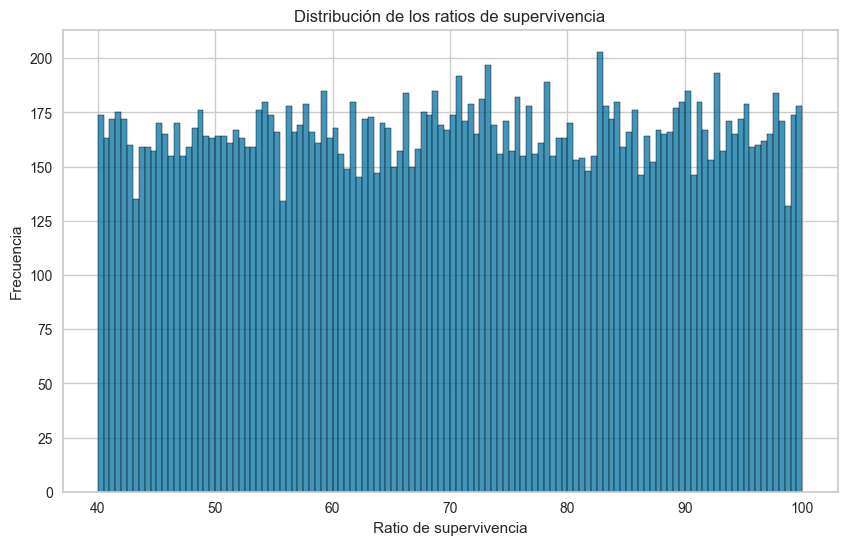

In [21]:
# REvisión de la distribución del ratio de supervivencia
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Survival_Rate'], bins=120)
plt.title('Distribución de los ratios de supervivencia')    
plt.xlabel('Ratio de supervivencia')
plt.ylabel('Frecuencia')
plt.show()

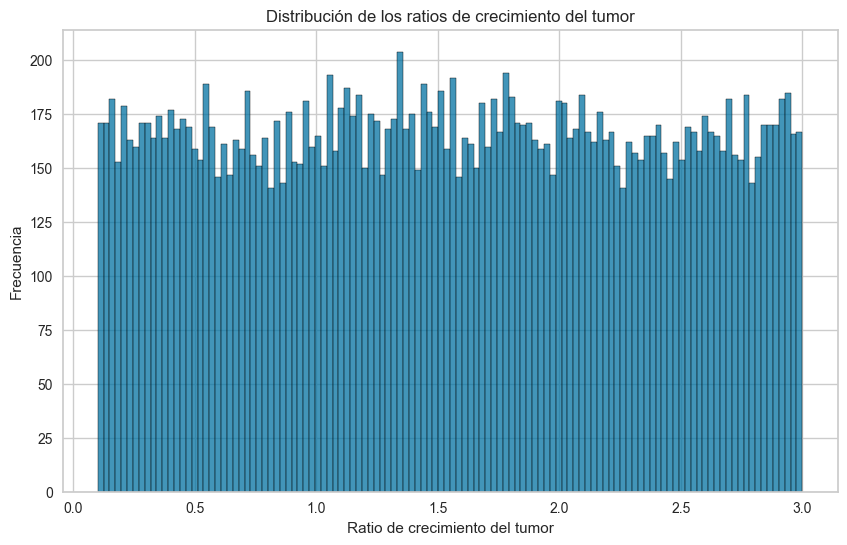

In [22]:
# Revisión de la distribución del crecimiento del tumor
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Tumor_Growth_Rate'], bins=120)
plt.title('Distribución de los ratios de crecimiento del tumor')
plt.xlabel('Ratio de crecimiento del tumor')
plt.ylabel('Frecuencia')
plt.show()

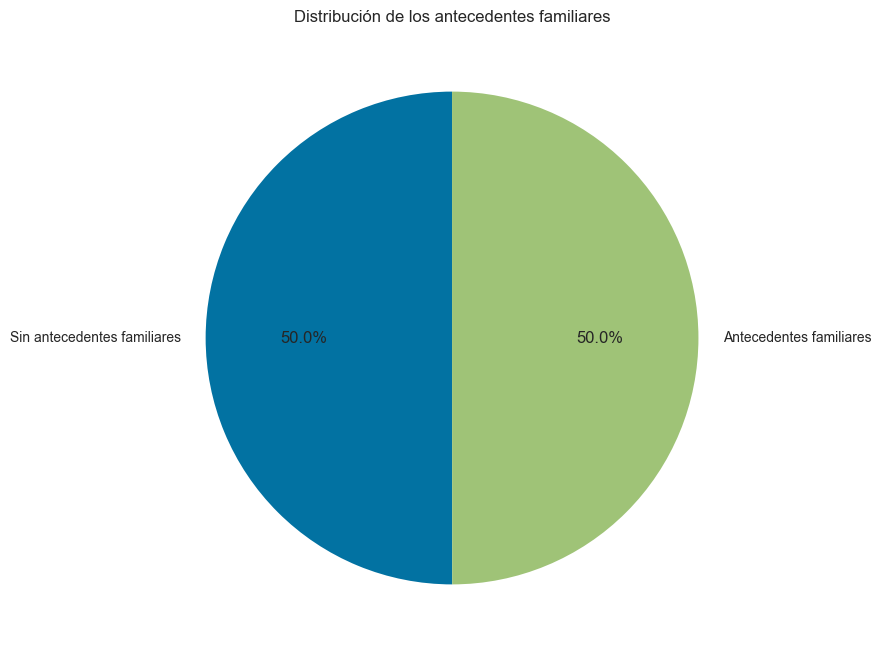

In [23]:
# Revisión de la distribución de los antecedentes familiares
family_history_counts = dataset['Family_History'].value_counts()
family_history_labels = ['Antecedentes familiares' if history == 1 else 'Sin antecedentes familiares' for history in family_history_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(family_history_counts, labels=family_history_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los antecedentes familiares')
plt.show()

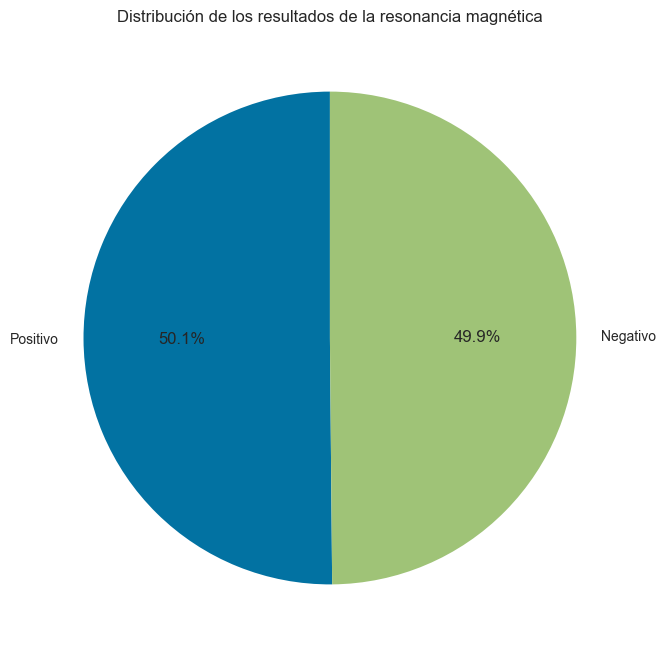

In [24]:
# Revision de la distribución de los resultados de la resonancia magnética
mri_counts = dataset['MRI_Result'].value_counts()
mri_labels = ['Positivo' if result == 1 else 'Negativo' for result in mri_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(mri_counts, labels=mri_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los resultados de la resonancia magnética')
plt.show()

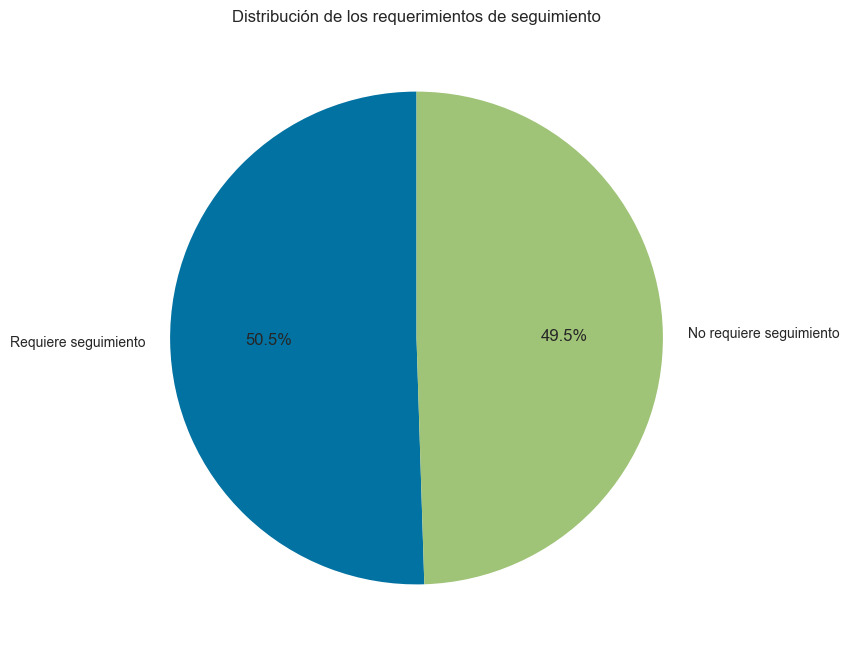

In [25]:
# Revisión de la distribución del requerimiento de seguimiento
follow_up_counts = dataset['Follow_Up_Required'].value_counts()
follow_up_labels = ['Requiere seguimiento' if follow_up == 1 else 'No requiere seguimiento' for follow_up in follow_up_counts.index]
plt.figure(figsize=(8, 8))
plt.pie(follow_up_counts, labels=follow_up_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los requerimientos de seguimiento')
plt.show()

## ML

Al parecer nuestro dataset se encuentra balanceado, por tanto, el balance no va a ser un problema. <br>
Nos toca definir cuál es el target, Kaggle nos dá 3 posibilidades: <br>
<ul>
    <li>Clasificación de tumores : predecir si un tumor es benigno o maligno.
    <li>Análisis de supervivencia : estimación de la tasa de supervivencia en función de diferentes características, como el tipo de tumor y el tratamiento.
    <li>Predicción de la necesidad de sguimiento : predecir la necesidad de seguimiento.
</ul>

Es un problema de clasificación con aprendizaje superivado, ya que tenemos las etiquetas, se eligió 
Vamos a iniciar con k-Nearest Neighbors y luego con Naive Bayes


### Preparación de los Datos

In [26]:
training_columns = ['Age', 'Gender', 'Tumor_Size', 'Location', 'Histology',	'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy', 'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result', 'Follow_Up_Required']

x = dataset[training_columns]
y = dataset['Tumor_Type']

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, random_state = 42, test_size=0.2, shuffle=True)

### K-Nearest Neighbors

C:\Users\Kiki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.503


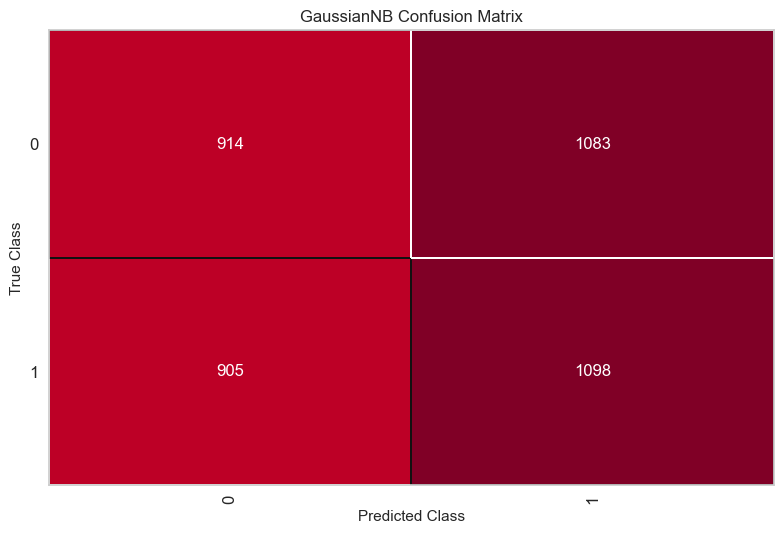

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
naive_bayes = sk.naive_bayes.GaussianNB()
naive_bayes.fit(x_train, y_train)
previsoes = naive_bayes.predict(x_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()

In [ ]:
naive_bayes = sk.naive_bayes.BernoulliNB()
naive_bayes.fit(x_train, y_train)
previsoes = naive_bayes.predict(x_test)

cm = yb.classifier.ConfusionMatrix(naive_bayes)
cm.fit(x_train, y_train)
score_naive_gaussian = cm.score(x_test, y_test)
print(score_naive_gaussian)
cm.show()